In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [4]:
bec = pd.read_csv("becfrance.csv", sep = ';', parse_dates=[10,11,24], dayfirst = True, engine='python', encoding=None)
bec

,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,ETATSCENARIO,...,nombreAccompagnant,montantTotal,Reduction,kilometrageAllerRetourTotalAutocarRetenu,typeTransport,ETATDEVIS,Appartenance,EMAILCREATEUR,STATUTDEVIS,DATEDEVIS
0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300,AGDE,Académie de Montpellier,1685,Grande-Bretagne,Chester,En cours,...,4,16766.01,Basse Saison,2995.00,Autocar + Traversée,Traité,Commercial,marcos@becfrance.com,Première demande,2015-10-20
1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300,AGDE,Académie de Montpellier,1117,Espagne,Madrid,En cours,...,2,10963.29,Basse Saison,1884.00,Autocar,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07
2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300,AGDE,Académie de Montpellier,1117,Espagne,Madrid,En cours,...,4,14708.33,Basse Saison,1884.00,Autocar,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07
3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300,AGDE,Académie de Montpellier,4949,Grande-Bretagne,Londres,En cours,...,4,28719.50,Aucune,695.00,TGV + Autocar français,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27
4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300,AGDE,Académie de Montpellier,4949,Grande-Bretagne,Londres,En cours,...,4,19470.83,Aucune,2685.00,Autocar + Traversée,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27
5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000,AGEN,Académie de Bordeaux,4176,Allemagne,Cologne,Non retenu,...,3,10935.16,Très basse saison,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18
6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000,AGEN,Académie de Bordeaux,4176,Allemagne,Cologne,Non retenu,...,4,14431.33,Très basse saison,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18
7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000,AGEN,Académie de Bordeaux,4176,Allemagne,Cologne,Non retenu,...,3,10935.16,Très basse saison,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18
8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000,AGEN,Académie de Bordeaux,4176,Allemagne,Cologne,En cours,...,3,13101.23,Aucune,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18
9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000,AGEN,Académie de Bordeaux,4176,Allemagne,Cologne,En cours,...,3,13978.02,Aucune,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 25 columns):
small                                       1770 non-null object
email                                       1767 non-null object
ETABLISSEMENT                               1770 non-null object
CPETAB                                      1770 non-null int64
VILLEETAB                                   1770 non-null object
ACADEMIE                                    1770 non-null object
NUMERODEVIS                                 1770 non-null int64
PAYS                                        1770 non-null object
DESTINATION                                 1770 non-null object
ETATSCENARIO                                1770 non-null object
dateDebutSejour                             1770 non-null datetime64[ns]
dateFinSejour                               1770 non-null datetime64[ns]
nombreElevesMoins16                         1770 non-null int64
nombreElevesEntre16et18            

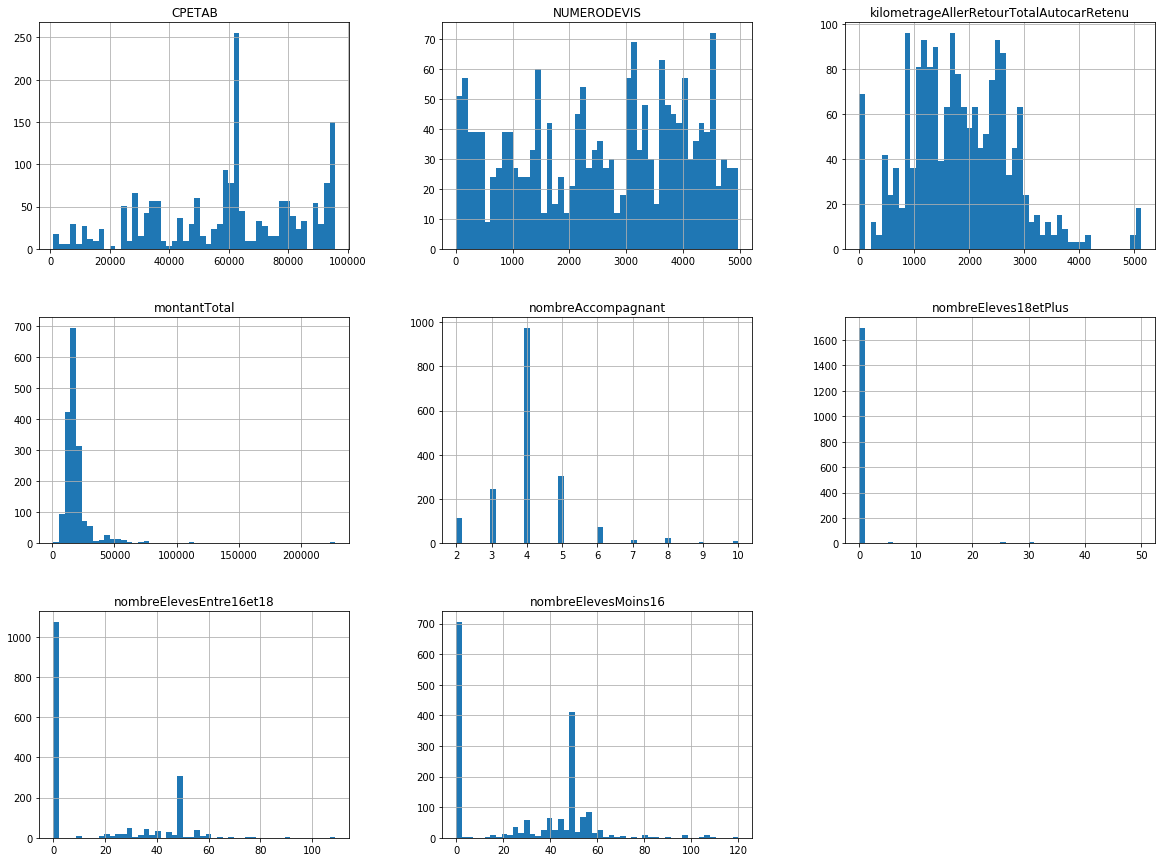

LYCEE GAMBETTA                                   111
COLLEGE JULES FERRY                               45
COLLEGE ALBERT CAMUS                              45
COLLEGE SAINT AUGUSTIN                            36
COLLEGE SIMONE SIGNORET                           36
COLLEGE PAUL ELUARD                               27
COLLEGE JEAN ROSTAND                              27
COLLEGE JEAN VILAR                                24
LYCEE JACQUES AMYOT                               24
LYCEE ST LOUIS                                    24
LYCEE SAINT LUC                                   21
LYCEE EMILE ZOLA                                  21
LYCEE LOUIS BERTRAND                              21
COLLEGE ROLLINAT                                  21
LYCEE ASSOMPTION SAINTE CLOTILDE ACS BORDEAUX     21
COLLEGE JULES FERRY                               21
COLLEGE ROSA LUXEMBURG                            21
COLLEGE JEAN BAUHIN                               18
COLLEGE ENDARRA                               

In [5]:
#Comprehension de la base 
bec.info()
bec.describe()
bec.hist(bins=50, figsize=(20,15))
plt.show()
bec['ETABLISSEMENT'].value_counts()

In [6]:
#Déterminons un dictionnaire qui représente les catégories d'établissement
categorie={
    "COLLEGE" : "COLLEGE",
    "LEAP" : "LYCEE",
    "LP" : "LYCEE",
    "LYCEE" : "LYCEE",
}

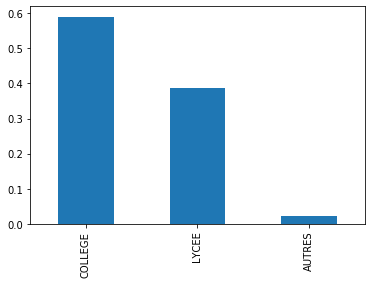

In [7]:
# Assignation des différents établissements à une categorie 
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "AUTRES"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result
bec["categ_etab"] = detect_words(bec["ETABLISSEMENT"], categorie)

bec["categ_etab"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [8]:
# Création de la variable target binarisée
def target(series):
    if series == 'Devis rejeté':
        return 'n_signe'
    elif series == 'Première demande':
        return 'n_signe'
    elif series == 'Contrat envoyé':
        return 'n_signe'
    elif series == 'Deuxième demande':
        return 'n_signe'
    elif series == 'Client intéressé':
        return 'n_signe'
    elif series == 'Contrat réceptionné signé':
        return 'signe'
    elif series == 'Confirmation formelle':
        return 'signe'
    elif series == 'Confirmation nonformelle':
        return 'signe'

bec['devis target'] = bec['STATUTDEVIS'].apply(target)
bec['devis target'].value_counts()

n_signe    1404
signe       363
Name: devis target, dtype: int64

In [9]:
# Définition d'une fonction générique en utilisant la fonction replace de Pandas
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded
#recodage de la variable cible numériquement
bec["devis target coded"] = coding(bec["devis target"], {'n_signe':0,'signe':1})

bec = bec.fillna(0) 

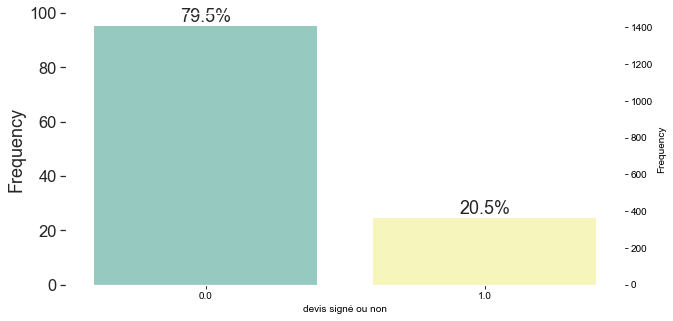

In [10]:
# Détermination de la distribution de la variable target
#""""""""##
def add_freq():
    ncount = len(bec)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
    
####""""""########
ax = sns.countplot(x = bec["devis target coded"] ,palette="Set3") 
sns.set(font_scale=1.5)
ax.set_xlabel('devis signé ou non')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
add_freq()
plt.show()

- Nous remarquons que notre variable target est trés asymétrique c'est-à-que notre variable cible est déséquimibré (ou imbalanced)

In [12]:
# Calcul pour les dates 
bec['dateDebutSejour'] = pd.to_datetime(bec['dateDebutSejour'])
bec['dateFinSejour'] = pd.to_datetime(bec['dateFinSejour'])
bec['DATEDEVIS'] = pd.to_datetime(bec['DATEDEVIS'])# Calcul pour les dates 

## Spécification de l'année et du mois de la commande de devis
bec["annee"] = bec["DATEDEVIS"].map(lambda d: d.year)
bec["mois"] = bec["DATEDEVIS"].map(lambda d: d.month)

bec["duree sejour"] = bec["dateFinSejour"]-bec["dateDebutSejour"]
bec['duree sejour'] = pd.to_numeric(bec['duree sejour'], errors='ignore')

bec_fr = bec.copy() # pour copier le dataframe afin qu'il soit indépendant

#La matrice de correlation
corr = pd.DataFrame()
corr = bec_fr.corr()
corr

,CPETAB,NUMERODEVIS,nombreElevesMoins16,nombreElevesEntre16et18,nombreEleves18etPlus,nombreAccompagnant,montantTotal,kilometrageAllerRetourTotalAutocarRetenu,devis target coded,annee,mois,duree sejour
CPETAB,1.000000,-0.029284,0.010068,-0.051759,0.003270,-0.047966,0.013223,-0.057422,0.038017,-0.024833,-0.031584,0.086792
NUMERODEVIS,-0.029284,1.000000,-0.078005,0.047147,-0.031030,0.017540,0.085891,-0.081452,-0.062021,0.981393,-0.141288,-0.037672
nombreElevesMoins16,0.010068,-0.078005,1.000000,-0.827888,-0.180464,0.415892,-0.018811,-0.110003,-0.037063,-0.066835,-0.013273,-0.086947
nombreElevesEntre16et18,-0.051759,0.047147,-0.827888,1.000000,-0.042341,0.012207,0.164709,0.095961,0.026886,0.045427,-0.015831,0.090508
nombreEleves18etPlus,0.003270,-0.031030,-0.180464,-0.042341,1.000000,-0.008602,0.008834,0.055187,-0.048775,-0.051426,0.098844,0.044460
nombreAccompagnant,-0.047966,0.017540,0.415892,0.012207,-0.008602,1.000000,0.202043,0.040814,-0.037571,0.026245,-0.022591,-0.000431
montantTotal,0.013223,0.085891,-0.018811,0.164709,0.008834,0.202043,1.000000,-0.037325,0.049997,0.076178,0.052162,0.756807
kilometrageAllerRetourTotalAutocarRetenu,-0.057422,-0.081452,-0.110003,0.095961,0.055187,0.040814,-0.037325,1.000000,-0.241479,-0.066899,-0.018618,0.198307
devis target coded,0.038017,-0.062021,-0.037063,0.026886,-0.048775,-0.037571,0.049997,-0.241479,1.000000,-0.049623,-0.056243,-0.041031
annee,-0.024833,0.981393,-0.066835,0.045427,-0.051426,0.026245,0.076178,-0.066899,-0.049623,1.000000,-0.312249,-0.035493


In [13]:
# Faisons la représentation graphique de la distribution empirique de certaines de nos variables
# en fonction de la variable target
bec0 = bec[bec["devis target coded"] == 0 ]
bec1 = bec[bec["devis target coded"] == 1 ]

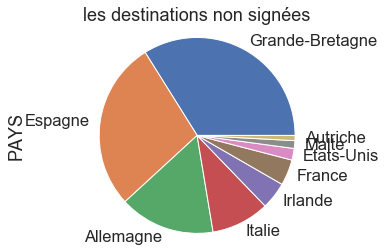

In [14]:
## Diagramme cammambert des pays de destinantions non signées
bec0["PAYS"].value_counts(normalize=True).plot(kind='pie')
plt.title("les destinations non signées")
plt.axis('equal')  # Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.show() 

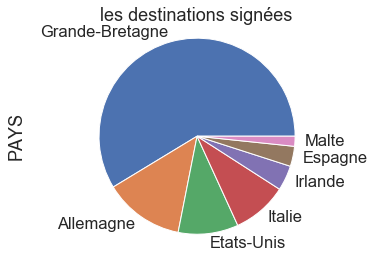

In [15]:
## Diagramme cammambert des pays de destinantions signées
bec1["PAYS"].value_counts(normalize=True).plot(kind='pie')
plt.title("les destinations signées")
plt.axis('equal')  # Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.show() 

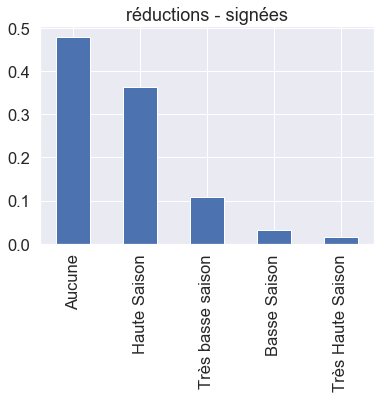

In [16]:
## Diagramme en barres pour voir les devis signées en fontions des reductions accordées 
bec1["Reduction"].value_counts(normalize=True).plot(kind='bar')
plt.title("réductions - signées")
plt.show()

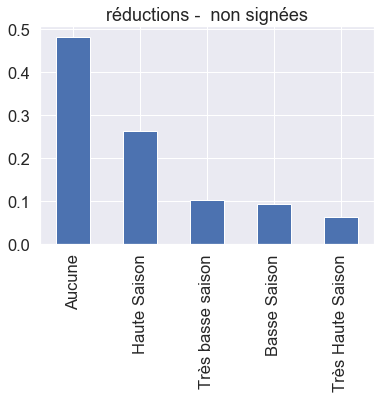

In [17]:
## Diagramme en barres pour voir les devis signées en fontions des reductions accordées 
bec0["Reduction"].value_counts(normalize=True).plot(kind='bar')
plt.title("réductions -  non signées")
plt.show()

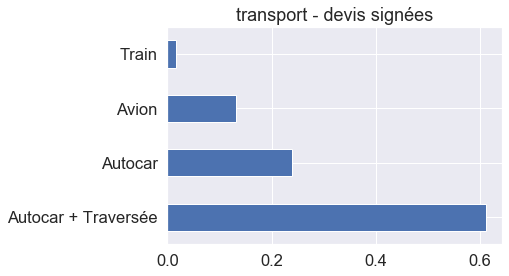

In [18]:
## Diagramme pour voire quel est le type de transport le plus choisi par les devis signés
bec1["typeTransport"].value_counts(normalize=True).plot(kind='barh')
plt.title("transport - devis signées")
plt.show()

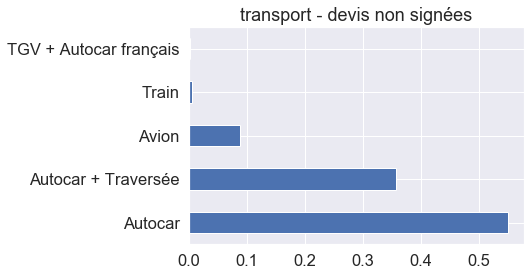

In [19]:
## Diagramme pour voire quel est le type de transport le plus choisi par les devis non signés
bec0["typeTransport"].value_counts(normalize=True).plot(kind='barh')
plt.title("transport - devis non signées")
plt.show()

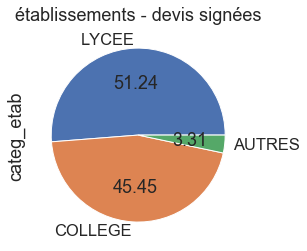

In [20]:
## Diagramme des catégories d'établissements qui ont le plus signées 
bec1["categ_etab"].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')
plt.title("établissements - devis signées")
plt.show()

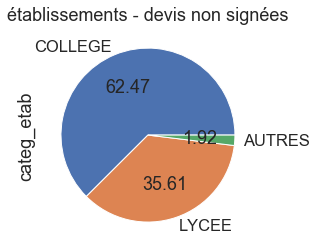

In [21]:
## Diagramme des catégories d'établissements qui ont le plus signées 
bec0["categ_etab"].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')
plt.title("établissements - devis non signées")
plt.show()

In [24]:
################ Faisons une détection des valeurs abérentes ##############
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # Itération sur les collones
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # limite des outliers
        outlier_step = 1.5 * IQR
        
        # Détermination d'une liste d'indices des outliers pour la fonction col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # ajouter les indices des outliers trouvées pour col à la liste des indices des outliers
        outlier_indices.extend(outlier_list_col)
        
    # Sélection des observations qui contiennent plus de 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# Supression des outliers que l'on retrouve dans le dataset
Outliers_to_drop = detect_outliers(bec,2,["nombreElevesMoins16",
                                            "nombreElevesEntre16et18",
                                            "nombreEleves18etPlus",
                                            "nombreAccompagnant",
                                            "montantTotal",
                                            "kilometrageAllerRetourTotalAutocarRetenu"])

bec.loc[Outliers_to_drop]

,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,ETATSCENARIO,...,Appartenance,EMAILCREATEUR,STATUTDEVIS,DATEDEVIS,categ_etab,devis target,devis target coded,annee,mois,duree sejour
479,Mme,5cda9f4a5d5a0@mail.com,LYCEE DU GRAND CERF,95870,BEZONS,Académie de Versailles,2749,Malte,Malte,Non retenu,...,Personnel,eric@becfrance.com,Première demande,2016-11-08,LYCEE,n_signe,0.0,2016,11,2073600000000000
480,Mme,5cda9f4a5d5a0@mail.com,LYCEE DU GRAND CERF,95870,BEZONS,Académie de Versailles,2749,Malte,Malte,Retenu,...,Personnel,eric@becfrance.com,Première demande,2016-11-08,LYCEE,n_signe,0.0,2016,11,1814400000000000
496,Mme,5cda9fb420fe0@mail.com,LYCEE TECHNOLOGIQUE SAINT VINCENT DE PAUL,33000,BORDEAUX,Académie de Bordeaux,4382,Malte,Malte,En cours,...,Personnel,caroline@becfrance.com,Devis rejeté,2018-09-06,LYCEE,n_signe,0.0,2018,9,604800000000000
1069,Mme,5cda9f4a5d5a0@mail.com,LYCEE DU GRAND CERF,95870,BEZONS,Académie de Versailles,2749,Malte,Malte,Non retenu,...,Personnel,eric@becfrance.com,Première demande,2016-11-08,LYCEE,n_signe,0.0,2016,11,2073600000000000
1070,Mme,5cda9f4a5d5a0@mail.com,LYCEE DU GRAND CERF,95870,BEZONS,Académie de Versailles,2749,Malte,Malte,Retenu,...,Personnel,eric@becfrance.com,Première demande,2016-11-08,LYCEE,n_signe,0.0,2016,11,1814400000000000
1086,Mme,5cda9fb420fe0@mail.com,LYCEE TECHNOLOGIQUE SAINT VINCENT DE PAUL,33000,BORDEAUX,Académie de Bordeaux,4382,Malte,Malte,En cours,...,Personnel,caroline@becfrance.com,Devis rejeté,2018-09-06,LYCEE,n_signe,0.0,2018,9,604800000000000
1659,Mme,5cda9f4a5d5a0@mail.com,LYCEE DU GRAND CERF,95870,BEZONS,Académie de Versailles,2749,Malte,Malte,Non retenu,...,Personnel,eric@becfrance.com,Première demande,2016-11-08,LYCEE,n_signe,0.0,2016,11,2073600000000000
1660,Mme,5cda9f4a5d5a0@mail.com,LYCEE DU GRAND CERF,95870,BEZONS,Académie de Versailles,2749,Malte,Malte,Retenu,...,Personnel,eric@becfrance.com,Première demande,2016-11-08,LYCEE,n_signe,0.0,2016,11,1814400000000000
1676,Mme,5cda9fb420fe0@mail.com,LYCEE TECHNOLOGIQUE SAINT VINCENT DE PAUL,33000,BORDEAUX,Académie de Bordeaux,4382,Malte,Malte,En cours,...,Personnel,caroline@becfrance.com,Devis rejeté,2018-09-06,LYCEE,n_signe,0.0,2018,9,604800000000000
506,Mme,5cda9facc88d1@mail.com,COLLEGE CONDORCET,60510,BRESLES,Académie d'Amiens,3298,Malte,Malte,En cours,...,Personnel,caroline@becfrance.com,Devis rejeté,2017-09-07,COLLEGE,n_signe,0.0,2017,9,432000000000000


# ########### MISE EN PLACE DE L'ALGORITHME DE PREDICTION ###########################################

In [25]:
## Notre base se compose de variable qualitatives et quantitatives donc nous allons utiliser 
## la fonction labelEncoder pour encoder les variables catégorielles
bec['kilometrageAllerRetourTotalAutocarRetenu'] = bec['kilometrageAllerRetourTotalAutocarRetenu'].astype('int64')
bec['montantTotal'] = bec['montantTotal'].astype('int64')

bec.drop(labels=["small", "VILLEETAB", "NUMERODEVIS", "DESTINATION", "dateDebutSejour", "dateFinSejour", "EMAILCREATEUR", "DATEDEVIS", "devis target" ],axis = 1,inplace=True)


labelEncoder = preprocessing.LabelEncoder()

bec['ETABLISSEMENT']=labelEncoder.fit_transform(bec['ETABLISSEMENT'])
bec['ACADEMIE']=labelEncoder.fit_transform(bec['ACADEMIE'])
bec['PAYS']=labelEncoder.fit_transform(bec['PAYS'])
bec['Reduction']=labelEncoder.fit_transform(bec['Reduction'])
bec['typeTransport']=labelEncoder.fit_transform(bec['typeTransport'])
bec['categ_etab']=labelEncoder.fit_transform(bec['categ_etab'])

In [26]:
#Les variables explicatives
X = bec[['email','ETABLISSEMENT','CPETAB', 'ACADEMIE', 'PAYS', 'ETATSCENARIO',
         'nombreElevesMoins16', 'nombreElevesEntre16et18', 'nombreEleves18etPlus','nombreAccompagnant',
         'montantTotal', 'Reduction', 'kilometrageAllerRetourTotalAutocarRetenu', 'typeTransport',
         'ETATDEVIS', 'Appartenance', 'STATUTDEVIS', 'categ_etab', 'devis target coded',
         'devis target coded', 'annee', 'mois', 'duree sejour']]

#La variable target
Y = bec['devis target coded']

In [27]:
### Divisons de la base en train et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Copie des 2 parties de la base test
X_test_result = X_test.copy()
Y_test_result = Y_test.copy()

### Suppression des variables inutilisables 
X_train.drop(labels=["email", "ETATDEVIS", "STATUTDEVIS", "ETATSCENARIO", "Appartenance", "devis target coded"],axis = 1,inplace=True)
X_test.drop(labels=["email", "ETATDEVIS", "STATUTDEVIS", "ETATSCENARIO", "Appartenance", "devis target coded"],axis = 1,inplace=True)

In [30]:
## Faisons une normalisation et une standarisation du dataset
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler1 = preprocessing.StandardScaler().fit(X_test)
X_test = scaler1.transform(X_test) 

array([[ 0.83755498, -1.0046146 ,  0.08141435, ..., -0.84528913,
         0.71986538,  0.21346202],
       [ 0.64303838, -0.73120861,  0.70053662, ...,  0.54726043,
         0.31646109,  0.21346202],
       [ 0.49715092, -1.05144989, -1.15683019, ...,  1.24353522,
         0.71986538,  0.21346202],
       ...,
       [-0.55648069, -1.1547277 ,  0.08141435, ..., -0.84528913,
        -1.70056037, -0.29056663],
       [ 0.61061894, -0.04589227, -0.53770792, ...,  1.24353522,
        -2.50736896, -0.0385523 ],
       [-0.11881833,  0.8740008 ,  1.62922002, ..., -0.84528913,
        -0.49034749, -0.0385523 ]])

In [31]:
### Déterminons le modéle d'apprentissage avec GradientBoostingClassifier 
type_classifier = GradientBoostingClassifier
gbc_bec = type_classifier()
gbc_bec = gbc_bec.fit(X_train, Y_train.ravel())   ### ravel permet d'éviter de prendre en compte l'index de Y_train

[[1028    9]
 [  10  280]]
[[368   2]
 [ 15  58]]


Text(0.5, 0, 'Predicted label')

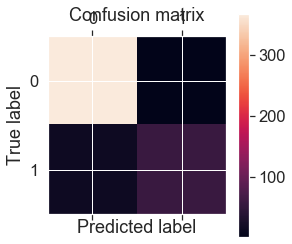

In [32]:
### Détermination des résultats du modèle sur la base de test
for x,y in [ (X_train, Y_train), (X_test, Y_test) ]:
    yp  = gbc_bec.predict(x)
    conf_mat = confusion_matrix(y.ravel(), yp.ravel())      
    print(conf_mat)
plt.matshow(conf_mat)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Variable Importance')

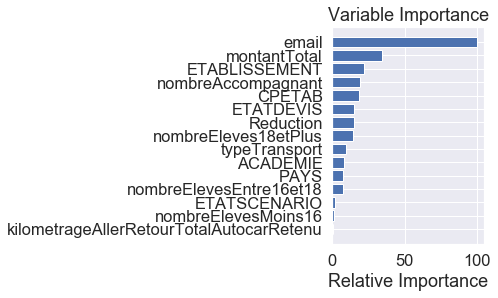

In [34]:
### Regardons l'importance de nos variables dans le modèle
feature_name = X_test_result.columns
limit = 15
feature_importance = gbc_bec.feature_importances_[:15]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_name[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

('taux de bonne réponse', 0.961625282167038)

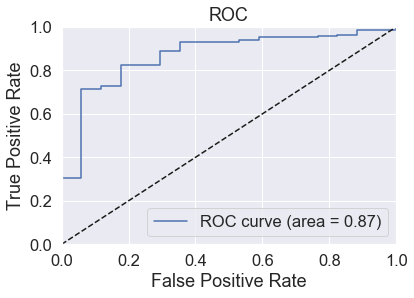

In [39]:
###### Représentation de la courbe ROC pour évaluer le score du model
probas = gbc_bec.predict_proba(X_test)
probas[:]

rep = [ ]
yt = Y_test.ravel()
for i in range(probas.shape[0]):
    p0,p1 = probas[i,:]
    exp = yt[i]
    if p0 > p1 :
        if exp == 0 :
            # bonne réponse
            rep.append ( (1, p0) )
        else :
            # mauvaise réponse
            rep.append( (0,p0) )
    else :
        if exp == 0 :
            # mauvaise réponse
            rep.append ( (0, p1) )
        else :
            # bonne réponse
            rep.append( (1,p1) )
mat_rep = np.array(rep)
mat_rep[:]

fpr, tpr, thresholds = roc_curve(mat_rep[:,0], mat_rep[:, 1])
roc_auc = auc(fpr, tpr)
plt_roc = plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt_roc_plot = plt.plot([0, 1], [0, 1], 'k--')
plt_roc_xlim = plt.xlim([0.0, 1.0])
plt_roc_ylim = plt.ylim([0.0, 1.0])
plt_roc_xlab = plt.xlabel('False Positive Rate')
plt_roc_ylabel = plt.ylabel('True Positive Rate')
plt_roc_title = plt.title('ROC')
plt_roc_legend = plt.legend(loc="lower right")
#score du modele
score_model = "taux de bonne réponse",sum(mat_rep[:,0]/len(mat_rep))
score_model

In [40]:
### Mettre les scores sur un dataframe
score = pd.DataFrame(probas)
score_signe = score [ 1 ]
score_signe = score_signe.to_frame()
score_signe = score_signe*100
score_signe

,1
0,8.454232
1,2.651450
2,64.689343
3,4.084912
4,1.352874
5,5.145331
6,1.126121
7,5.550893
8,0.844259
9,17.275414


In [41]:
#### Cross validation pour evaluer la precison du score du modele
score_cross_val = cross_val_score(gbc_bec, X_test, Y_test, cv=10)
score_cross_val

array([0.88888889, 0.82222222, 0.93333333, 0.95454545, 0.88636364,
       0.95454545, 0.93181818, 0.88636364, 0.97727273, 0.93181818])